<a href="https://colab.research.google.com/github/khanm42/Credit-Card-Fraud-Detection-Using-Classification-Models/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== MODEL COMPARISON SUMMARY ===
                 Model  Accuracy  Precision (Fraud)  Recall (Fraud)  \
0  Logistic Regression    0.9755             0.0609          0.9184   
1                 k-NN    0.9995             0.9186          0.8061   
2        Decision Tree    0.9989             0.6762          0.7245   

   F1-Score (Fraud)  
0            0.1141  
1            0.8587  
2            0.6995  


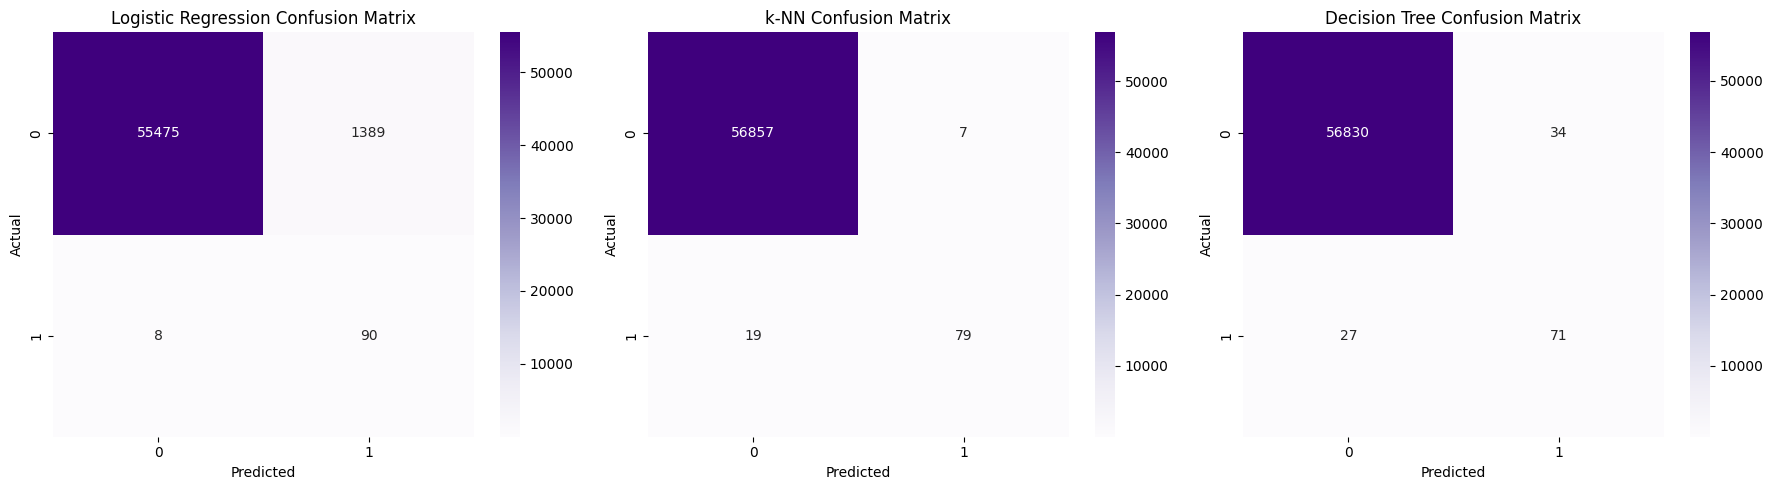

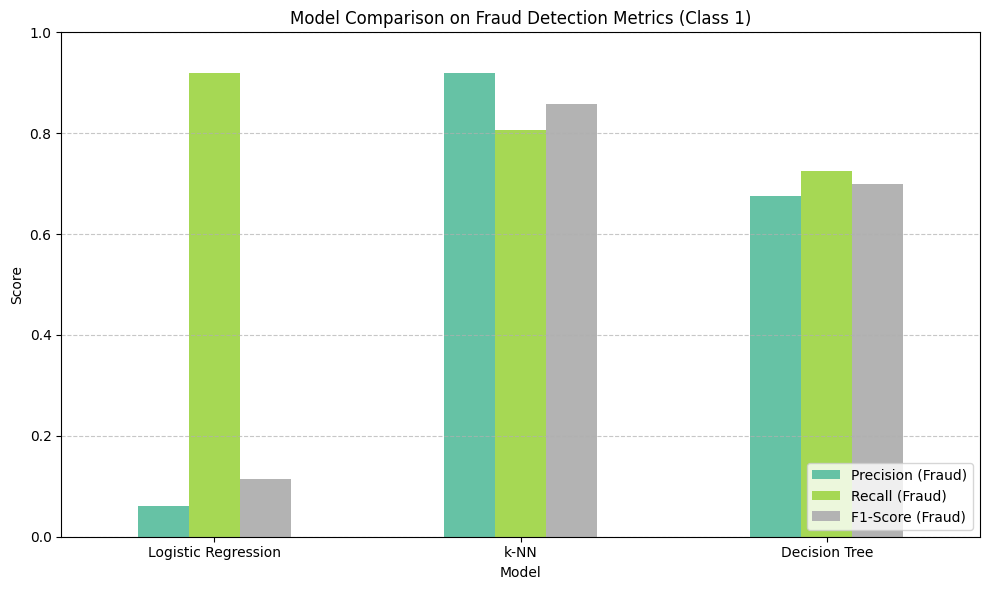

In [5]:
# === 1. Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# === 2. Load File from Uploaded Section ===
df = pd.read_csv("creditcard.csv")  # Works if you uploaded via Colab "Files" section

# === 3. Preprocessing ===
scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === 4. Define Models ===
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42)
}

results = []
conf_matrices = {}

# === 5. Train and Evaluate Models ===
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision (Fraud)": round(report['1']['precision'], 4),
        "Recall (Fraud)": round(report['1']['recall'], 4),
        "F1-Score (Fraud)": round(report['1']['f1-score'], 4)
    })

    conf_matrices[name] = cm

summary_df = pd.DataFrame(results)
print("=== MODEL COMPARISON SUMMARY ===")
print(summary_df)

# === 6. Confusion Matrices ===
plt.figure(figsize=(18, 5))
for i, (name, cm) in enumerate(conf_matrices.items()):
    plt.subplot(1, 3, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# === 7. Metric Comparison Plot (Fraud Class) ===
metrics_df = summary_df.set_index("Model")[["Precision (Fraud)", "Recall (Fraud)", "F1-Score (Fraud)"]]
metrics_df.plot(kind="bar", figsize=(10, 6), colormap="Set2")
plt.title("Model Comparison on Fraud Detection Metrics (Class 1)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
